In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import seaborn as sns


In [2]:
df = pd.read_csv('data.csv')

In [3]:
df = df.drop(['id', 'Unnamed: 32'], axis=1)

In [4]:
df['diagnosis'] = df['diagnosis'].map({'M': 0, 'B': 1})

In [5]:
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [8]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000)

In [9]:
print("Training Accuracy:", accuracy_score(y_train, model.predict(X_train_scaled)))
print("Test Accuracy:", accuracy_score(y_test, model.predict(X_test_scaled)))

Training Accuracy: 0.9868131868131869
Test Accuracy: 0.9736842105263158


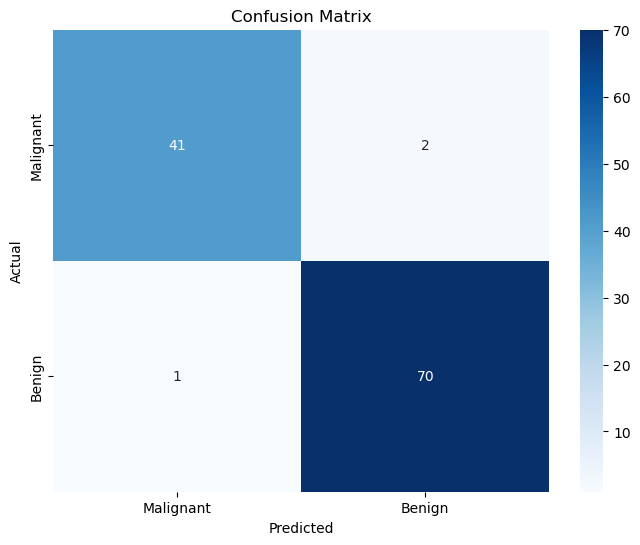

In [12]:
y_pred = model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Malignant', 'Benign'], yticklabels=['Malignant', 'Benign'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

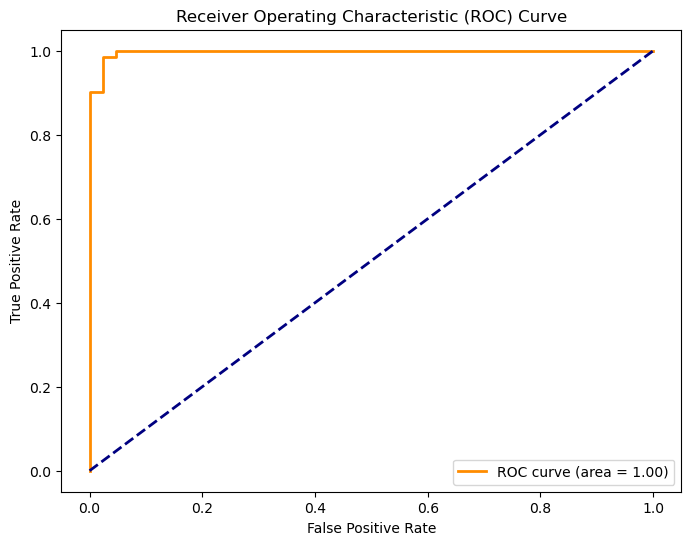

In [17]:
# 2. ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test_scaled)[:, 1])
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


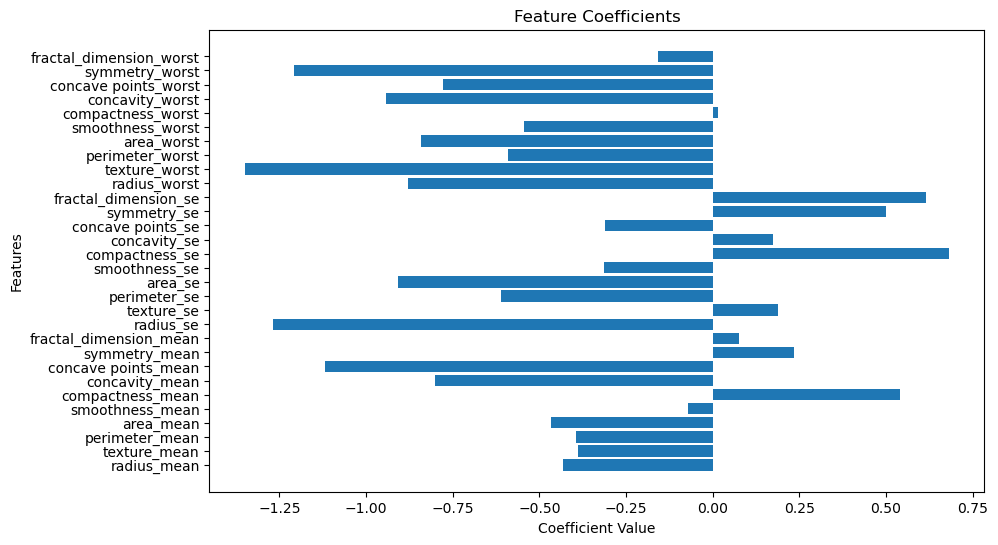

In [18]:
# 3. Feature Importance (Coefficients Plot)
coefficients = model.coef_[0]
features = X.columns
plt.figure(figsize=(10, 6))
plt.barh(features, coefficients)
plt.title('Feature Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.show()